In [20]:
import pandas as pd
import numpy as np
import string as s
import seaborn as sns
import math
from collections import defaultdict
# import tables
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style, colors
from itertools import groupby
import matplotlib.patches as patches
from matplotlib import gridspec
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, fclusterdata, leaves_list
from scipy.spatial.distance import pdist
from scipy.ndimage.interpolation import shift
# matplotlib.style.use('ggplot')
# %matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
from matplotlib.colors import rgb2hex, colorConverter
# matplotlib.rcParams['figure.facecolor'] = 'white'
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_swiss_roll
matplotlib.style.use('ggplot')
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [21]:
# signiture and cnv

In [22]:
wkdir = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/signature/'

In [23]:
f1 = '{}mutation_signatures.txt'.format(wkdir)
dfm = pd.read_csv(f1, index_col='Somatic Mutation Type')
dfm.head(2)

,POG001_FFPE,POG002_FFPE,POG005_FFPE,POG008_FFPE,POG010_FFPE,POG011_FFPE,POG012_FFPE,POG016_FFPE,POG017_FFPE,POG018_FFPE,...,POG966_FF,POG967_FF,POG969_FF,POG970_FF,POG974_FF,POG977_FF,POG978_FF,POG980_FF,POG983_FF,POG986_FF
Somatic Mutation Type,,,,,,,,,,,,,,,,,,,,,
A[C>A]A,0.024499,0.017854,0.018453,0.021405,0.034629,0.019604,0.013501,0.019210,0.023101,0.018986,...,0.016693,0.050587,0.012092,0.010916,0.016953,0.002970,0.021674,0.016826,0.014762,0.008892
A[C>A]C,0.008598,0.003871,0.004014,0.005476,0.009739,0.006099,0.003650,0.004971,0.008752,0.005101,...,0.014061,0.007079,0.010443,0.010916,0.015512,0.002044,0.010412,0.011894,0.007785,0.002604


In [36]:
f2 = '{}/covariates.txt'.format(wkdir)
df_cov = pd.read_csv(f2, index_col='covariate')
df_cov.head(2)

,POG001_FFPE,POG002_FFPE,POG005_FFPE,POG008_FFPE,POG010_FFPE,POG011_FFPE,POG012_FFPE,POG016_FFPE,POG017_FFPE,POG018_FFPE,...,POG966_FF,POG967_FF,POG969_FF,POG970_FF,POG974_FF,POG977_FF,POG978_FF,POG980_FF,POG983_FF,POG986_FF
covariate,,,,,,,,,,,,,,,,,,,,,
tissue_type,FFPE,FFPE,FFPE,FFPE,FFPE,FFPE,FFPE,FFPE,FFPE,FFPE,...,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF


In [37]:
map_dict =  {'FFPE': 1,'FF': 2, 'HTMCP': 3}
clrs = ["#CC79A7","#D55E00","#E41A1C"]
df_cov.loc['tissue_type',:] = df_cov.loc['tissue_type',].map(map_dict)
df_cov = df_cov.astype(float)
df_cov.head(2)

,POG001_FFPE,POG002_FFPE,POG005_FFPE,POG008_FFPE,POG010_FFPE,POG011_FFPE,POG012_FFPE,POG016_FFPE,POG017_FFPE,POG018_FFPE,...,POG966_FF,POG967_FF,POG969_FF,POG970_FF,POG974_FF,POG977_FF,POG978_FF,POG980_FF,POG983_FF,POG986_FF
covariate,,,,,,,,,,,,,,,,,,,,,
tissue_type,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [38]:
df_cov.shape

(1, 237)

<Figure size 432x288 with 0 Axes>

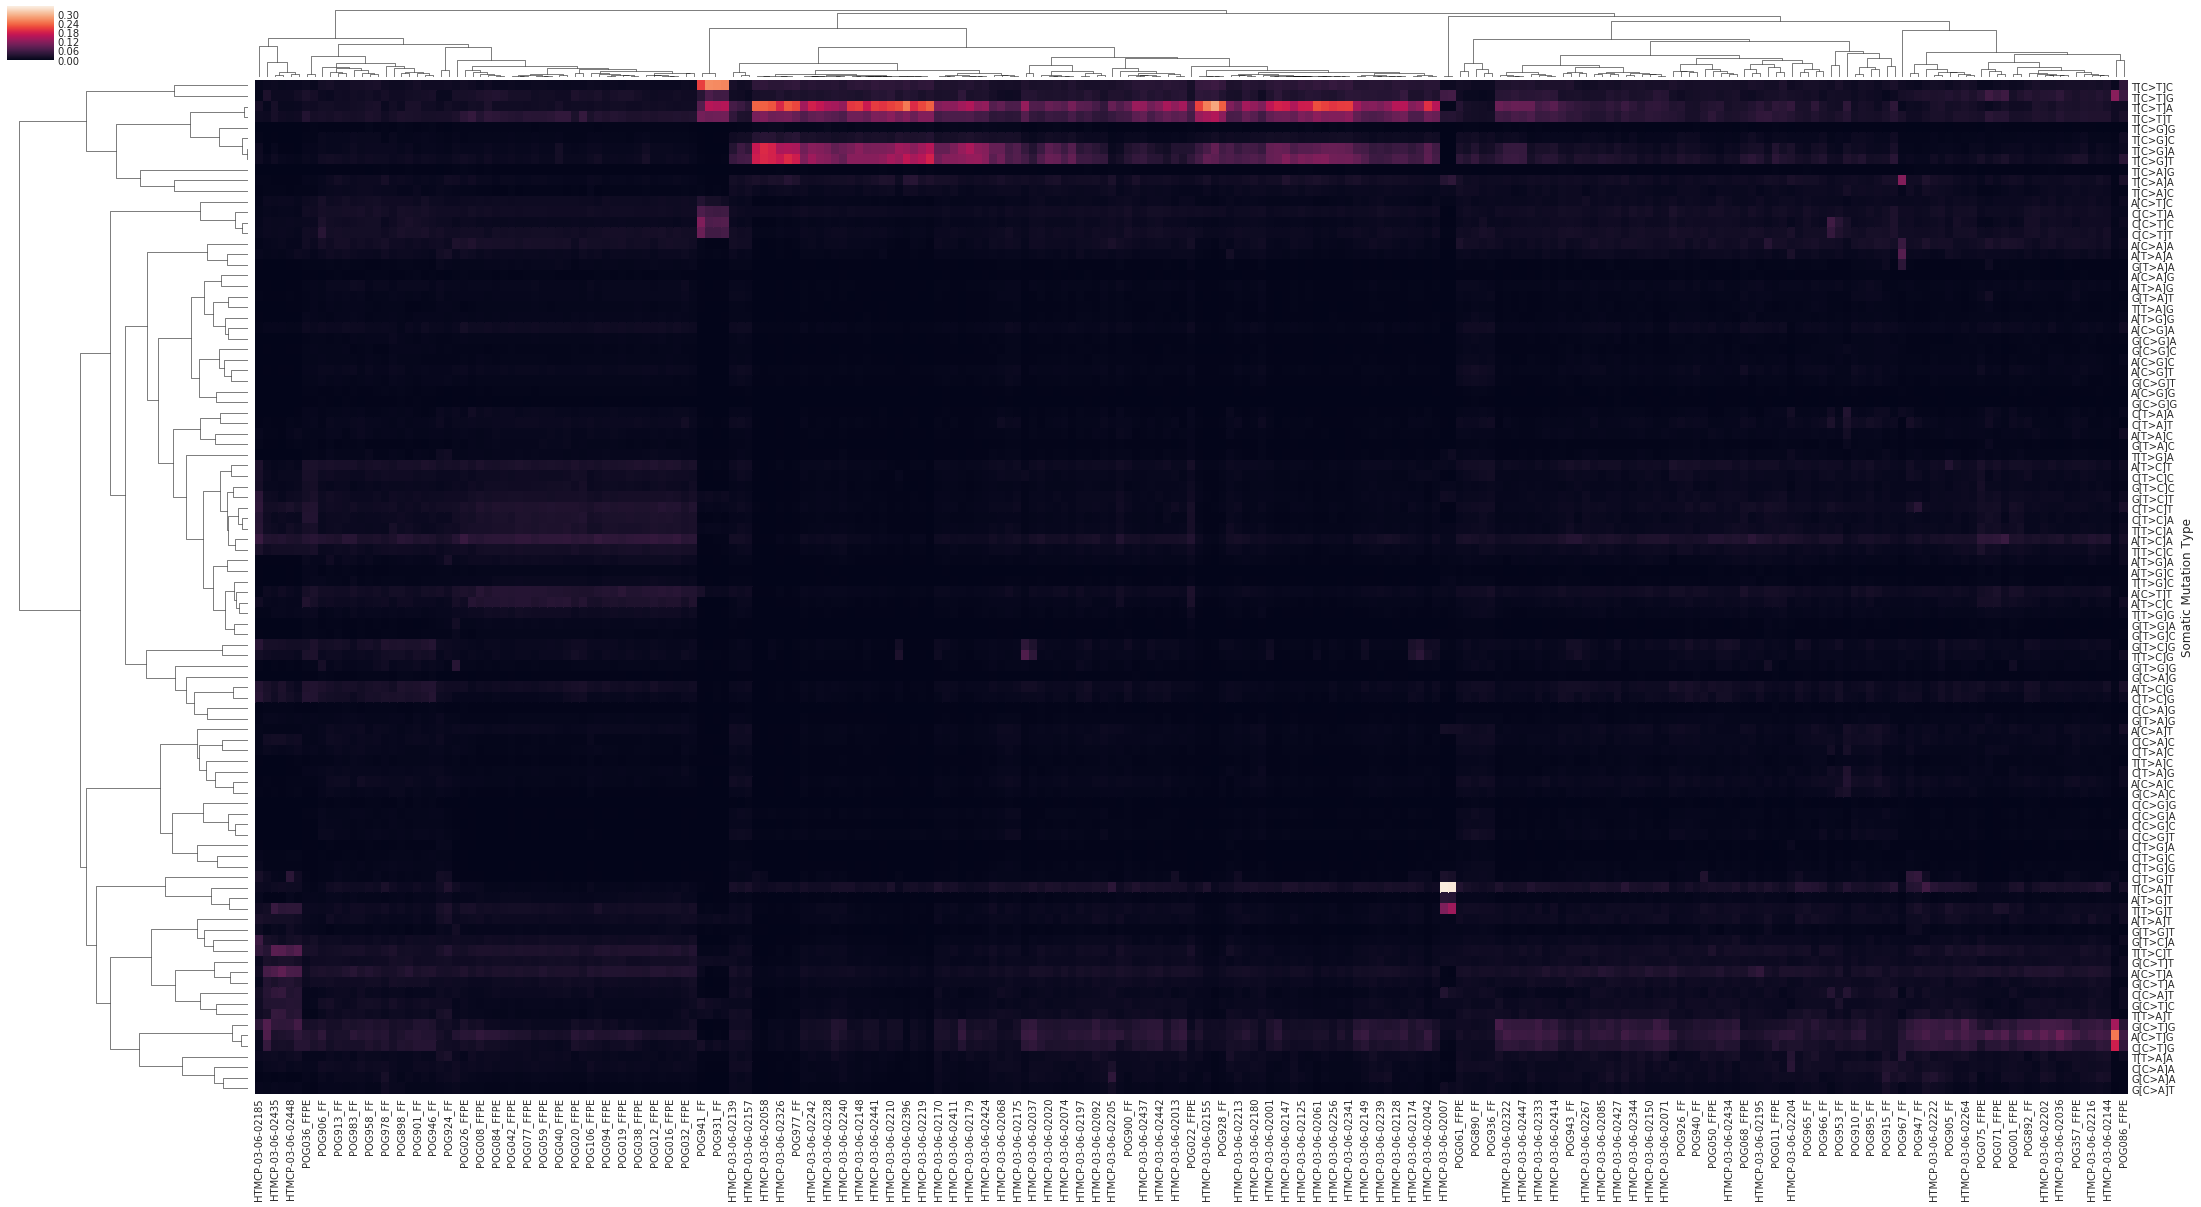

In [26]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='white')
    ax = sns.clustermap(dfm, method='complete', metric='correlation', figsize=(38,20))#, cmap=sns.color_palette("hls", 16))
    ax.savefig('{}_mutation_signature_clustering.png'.format(wkdir), bbox_inches='tight', dpi=300)

In [27]:
#use this to make clustered heatmap and use add_covariate to make separate tracksS
def plot_cluster_heatmap(dfm):  
    fig = plt.figure(figsize=(32, 18), facecolor='white')
    gs = gridspec.GridSpec(2, 2, width_ratios=[1,18], height_ratios=[1,10], 
                           wspace=0.0, # horizontal space
                           hspace=0.0  # vertical space
                          )    
    # plot covariate track: to develop
#     add_covariate(df_cov, map_dict, clrs)
    
     # add column dendrogram
    gs1 = gs[1]
    ax1 = fig.add_subplot(gs1, facecolor='white')
    ax1.set_title("")
    matrix = dfm.values.T
    dist='correlation'
    link='complete'    
    Z = linkage(pdist(matrix, dist), link)
    col_den = dendrogram(Z, leaf_rotation=90.,
                         labels = dfm.columns,
                         leaf_font_size=6.,
                         show_contracted=True, 
                         no_labels=True)
    col_den_labels = col_den['ivl']
    

    # add row dendrogram
    gs2 = gs[2]
    ax2 = fig.add_subplot(gs2, facecolor='white')
    ax2.set_title("")
    matrix = dfm.values
    Z = linkage(pdist(matrix, dist), link)
    aa = dendrogram(Z, orientation='left', 
                    leaf_rotation=0.,
                    labels = dfm.T.columns,
                    leaf_font_size=4.,
                    no_labels=True, 
                    show_contracted=True)#
    row_den_labels = aa['ivl']
    
 # add heatmap colorbar, shrink the ax to make the color bar thinner
    gs0 = gridspec.GridSpecFromSubplotSpec(1, 2,  
                                            width_ratios=[1, 2], 
                                            subplot_spec=gs[0])
#     gs0 = gs[0]
    ax00 = fig.add_subplot(gs0[0], facecolor='white')
    ax00.set_title("") #heatmap colorbar

    
#     add in heatmap
    gs3 = gs[3]
    ax3 = fig.add_subplot(gs3, facecolor='white')
    ax3.set_title("")
    df_hm = dfm[col_den_labels].reindex(row_den_labels)
#     print(df_hm.head())
    cmap = sns.light_palette('red', as_cmap=True)
    hmap = sns.heatmap(df_hm, 
                       ax=ax3, 
                       cmap=cmap, 
                       cbar=True, 
#                        square=True,
                       linewidths=.05,
                       yticklabels=True, 
                       cbar_ax=ax00, 
                       cbar_kws={"shrink": 5} )# shrink does not work?
    ax3.tick_params(axis='y', which='major', labelsize=5)
    ax3.set_yticklabels(ax3.yaxis.get_majorticklabels(), rotation=0)
    ax3.yaxis.tick_right()
    ax3.tick_params(axis='x', which='major', labelsize=5)
    ax3.set_xticks(np.arange(len(col_den_labels)))
    ax3.set_xticklabels(col_den_labels, rotation=90)
    ax3.set_ylabel('')
    print(len(col_den_labels))

    
    assert row_den_labels == df_hm.index.tolist()
    assert col_den_labels == df_hm.columns.tolist()

    of = '{}heatmap.png'.format(wkdir)
    %time plt.savefig(of, bbox_inches='tight',dpi=300)
    plt.show()
    plt.close()
    return col_den

In [39]:
def add_covariate(df, map_dict, clrs):
    # plot individual covariate track      
    types = len(map_dict)
    cmap = colors.ListedColormap(clrs)
    fig = plt.figure(figsize=(32,.5), facecolor='white')
    gs = gridspec.GridSpec(1, 2,                            
                           width_ratios=[1,18], 
                           wspace=0.0, # horizontal space
                           hspace=0.0  # vertical space
                          )
    gs0 = gs[1]     
    ax0 = plt.subplot(gs0)  
    _ = sns.heatmap(df, 
                    ax=ax0, 
                    cmap=cmap,
                    linewidths=.05,                    
                    xticklabels=False,
                    yticklabels=True,
                    cbar=False) #cbar_ax=ax1,
    ax0.tick_params(axis='y', which='major', labelsize=5)
    ax0.set_yticklabels(ax0.yaxis.get_majorticklabels(), rotation=0)
    ax0.yaxis.tick_right()
    
    gs1 = gs[0]
    ax1 =  plt.subplot(gs1, frameon=False)

    k = 0
    for key, clr in zip(map_dict.keys(), clrs):
        print(key, clr)
        rect = patches.Rectangle((0,k/types), 0.2, 1/types, 
                                 linewidth=0.001,
                                 edgecolor=clr,
                                 facecolor=clr)
        print('draw rect')
        _ = ax1.text(0.25, k/types+0.05, 
                     key, 
                     ha='left', 
                     va='center', 
                     fontsize=6)
        _ = ax1.add_patch(rect)
        k+=1
    ax1.get_xaxis().set_ticks([])
    ax1.get_yaxis().set_ticks([])
    ax1.set_title('')
    of = '{}heatmap_covariate.png'.format(wkdir)
    print('save plots!')
    %time plt.savefig(of, bbox_inches='tight',dpi=100)

#     sns.palplot(sns.color_palette(clrs))

In [29]:
# http://www.nxn.se/valent/extract-cluster-elements-by-color-in-python
def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))
    
    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l
    
    return cluster_classes

In [30]:
class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'
        
        html += '</table>'
        
        return html

In [31]:
# use this to combine covariate track and heatmap
def plot_cluster_heatmap_new(dfm, df_cov, map_dict, clrs):  
    fig = plt.figure(figsize=(32, 18), facecolor='white')    
    gs = gridspec.GridSpec(3, 2, width_ratios=[1,18], height_ratios=[.5,1,10], 
                           wspace=0.0, # horizontal space
                           hspace=0.0  # vertical space
                          )    

 
    
     # add column dendrogram
    gs3 = gs[3]
    ax3 = plt.subplot(gs3, facecolor='white', frameon=False)
    ax3.set_title("")
    matrix = dfm.values.T
    dist='correlation'
    link='complete'    
    Z = linkage(pdist(matrix, dist), link)
    col_den = dendrogram(Z, leaf_rotation=90.,
                         labels = dfm.columns,
                         leaf_font_size=6.,
                         show_contracted=True, 
                         no_labels=True)
    col_den_labels = col_den['ivl']
    

    # add row dendrogram
    gs4 = gs[4]
    ax4 = plt.subplot(gs4, facecolor='white', frameon=False)
    ax4.set_title("")
    matrix = dfm.values
    Z = linkage(pdist(matrix, dist), link)
    aa = dendrogram(Z, orientation='left', 
                    leaf_rotation=0.,
                    labels = dfm.T.columns,
                    leaf_font_size=4.,
                    no_labels=True, 
                    show_contracted=True)#
    row_den_labels = aa['ivl']
    
 # add heatmap colorbar, shrink the ax to make the color bar thinner
    gs2 = gridspec.GridSpecFromSubplotSpec(1, 2,  
                                            width_ratios=[1, 2], 
                                            subplot_spec=gs[2])
#     gs0 = gs[0]
    ax20 = plt.subplot(gs2[0], facecolor='white')
    ax20.set_title("") #heatmap colorbar

    
#     add in heatmap
    gs5 = gs[5]
    ax5 = plt.subplot(gs5, facecolor='white')
    ax5.set_title("")
    df_hm = dfm[col_den_labels].reindex(row_den_labels)
#     print(df_hm.head())
    cmap = sns.light_palette('red', as_cmap=True)
    hmap = sns.heatmap(df_hm, 
                       ax=ax5, 
                       cmap=cmap, 
                       cbar=True, 
#                        square=True,
                       linewidths=.05,
                       yticklabels=True, 
                       cbar_ax=ax20, 
                       cbar_kws={"shrink": 5} )# shrink does not work?
    ax5.tick_params(axis='y', which='major', labelsize=5)
    ax5.set_yticklabels(ax5.yaxis.get_majorticklabels(), rotation=0)
    ax5.yaxis.tick_right()
    ax5.tick_params(axis='x', which='major', labelsize=5)
    ax5.set_xticks(np.arange(len(col_den_labels)))
    ax5.set_xticklabels(col_den_labels, rotation=90)
    ax5.set_ylabel('')
    print(len(col_den_labels))
    
    # reorder df_cov according to columns in the dfm after clustering
    df_cov = df_cov[col_den_labels]
    types = len(map_dict)
    cmap = colors.ListedColormap(clrs)
    
    # make sure col labels are consistent
    assert df_cov.columns.tolist() == df_cov.columns.tolist()

    # add covariate track legend
    gs1 = gs[1]
    ax1 = plt.subplot(gs1, facecolor='white')
    ax1.set_title("")  
    _ = sns.heatmap(df_cov, 
                    ax=ax1, 
                    cmap=cmap,
                    linewidths=.05,                    
                    xticklabels=False,
                    yticklabels=True,
                    cbar=False) #cbar_ax=ax1,
    ax1.tick_params(axis='y', which='major', labelsize=5)
    ax1.set_yticklabels(ax1.yaxis.get_majorticklabels(), rotation=0)
    ax1.yaxis.tick_right()
    
    gs0 = gs[0]
    ax0 =  plt.subplot(gs0, frameon=False)

    k = 0
    for key, clr in zip(map_dict.keys(), clrs):
        print(key, clr)
        rect = patches.Rectangle((0,k/types), 0.2, 1/types, 
                                 linewidth=0.001,
                                 edgecolor=clr,
                                 facecolor=clr)
        print('draw rect')
        _ = ax0.text(0.25, k/types+0.05, 
                     key, 
                     ha='left', 
                     va='center', 
                     fontsize=6)
        _ = ax0.add_patch(rect)
        k+=1
    ax0.get_xaxis().set_ticks([])
    ax0.get_yaxis().set_ticks([])
    ax0.set_title('')
    
    assert row_den_labels == df_hm.index.tolist()
    assert col_den_labels == df_hm.columns.tolist()


    of = '{}heatmap.png'.format(wkdir)
    %time plt.savefig(of, bbox_inches='tight',dpi=300)
    plt.show()
    plt.close()
    return col_den

237
FFPE #CC79A7
draw rect
FF #D55E00
draw rect
HTMCP #E41A1C
draw rect
CPU times: user 6.65 s, sys: 469 ms, total: 7.11 s
Wall time: 7.11 s


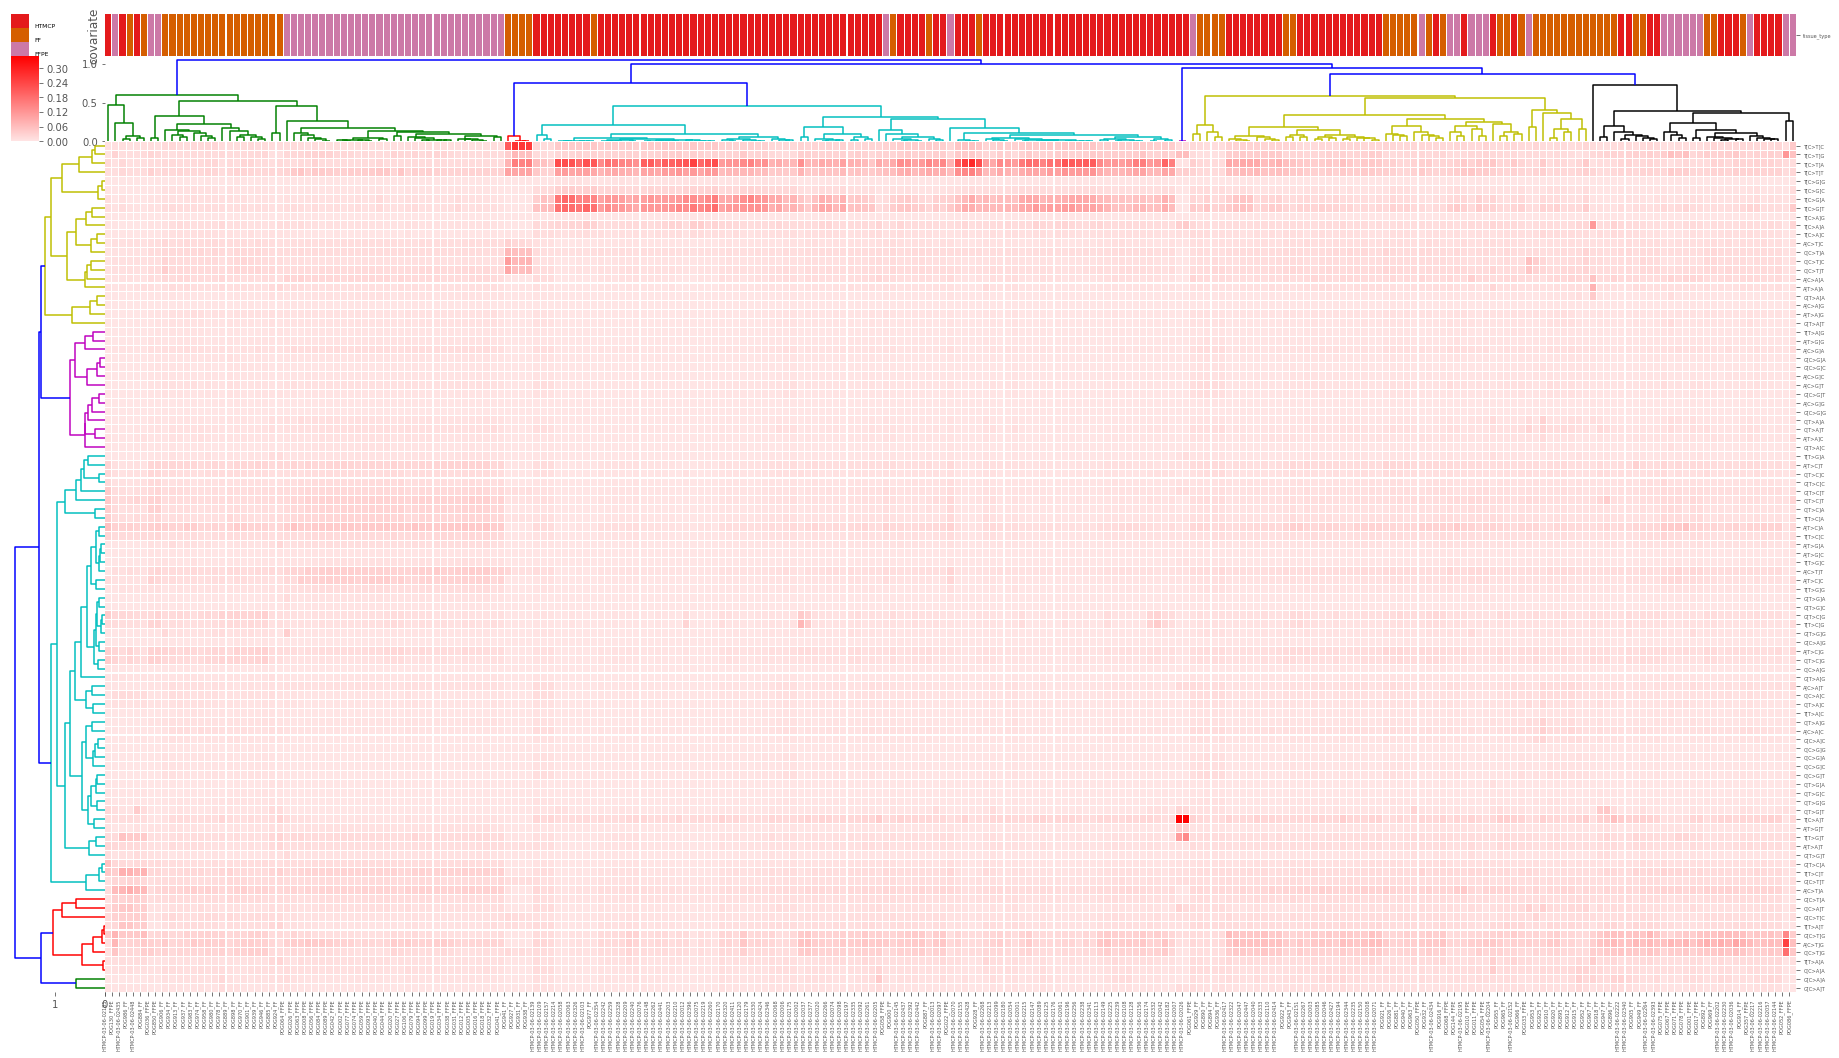

In [35]:
# plot heatmap + dendrogram, and covariate track together
col_dendrogram = plot_cluster_heatmap_new(dfm, df_cov, map_dict, clrs)

237
CPU times: user 11.4 s, sys: 626 ms, total: 12 s
Wall time: 12.2 s


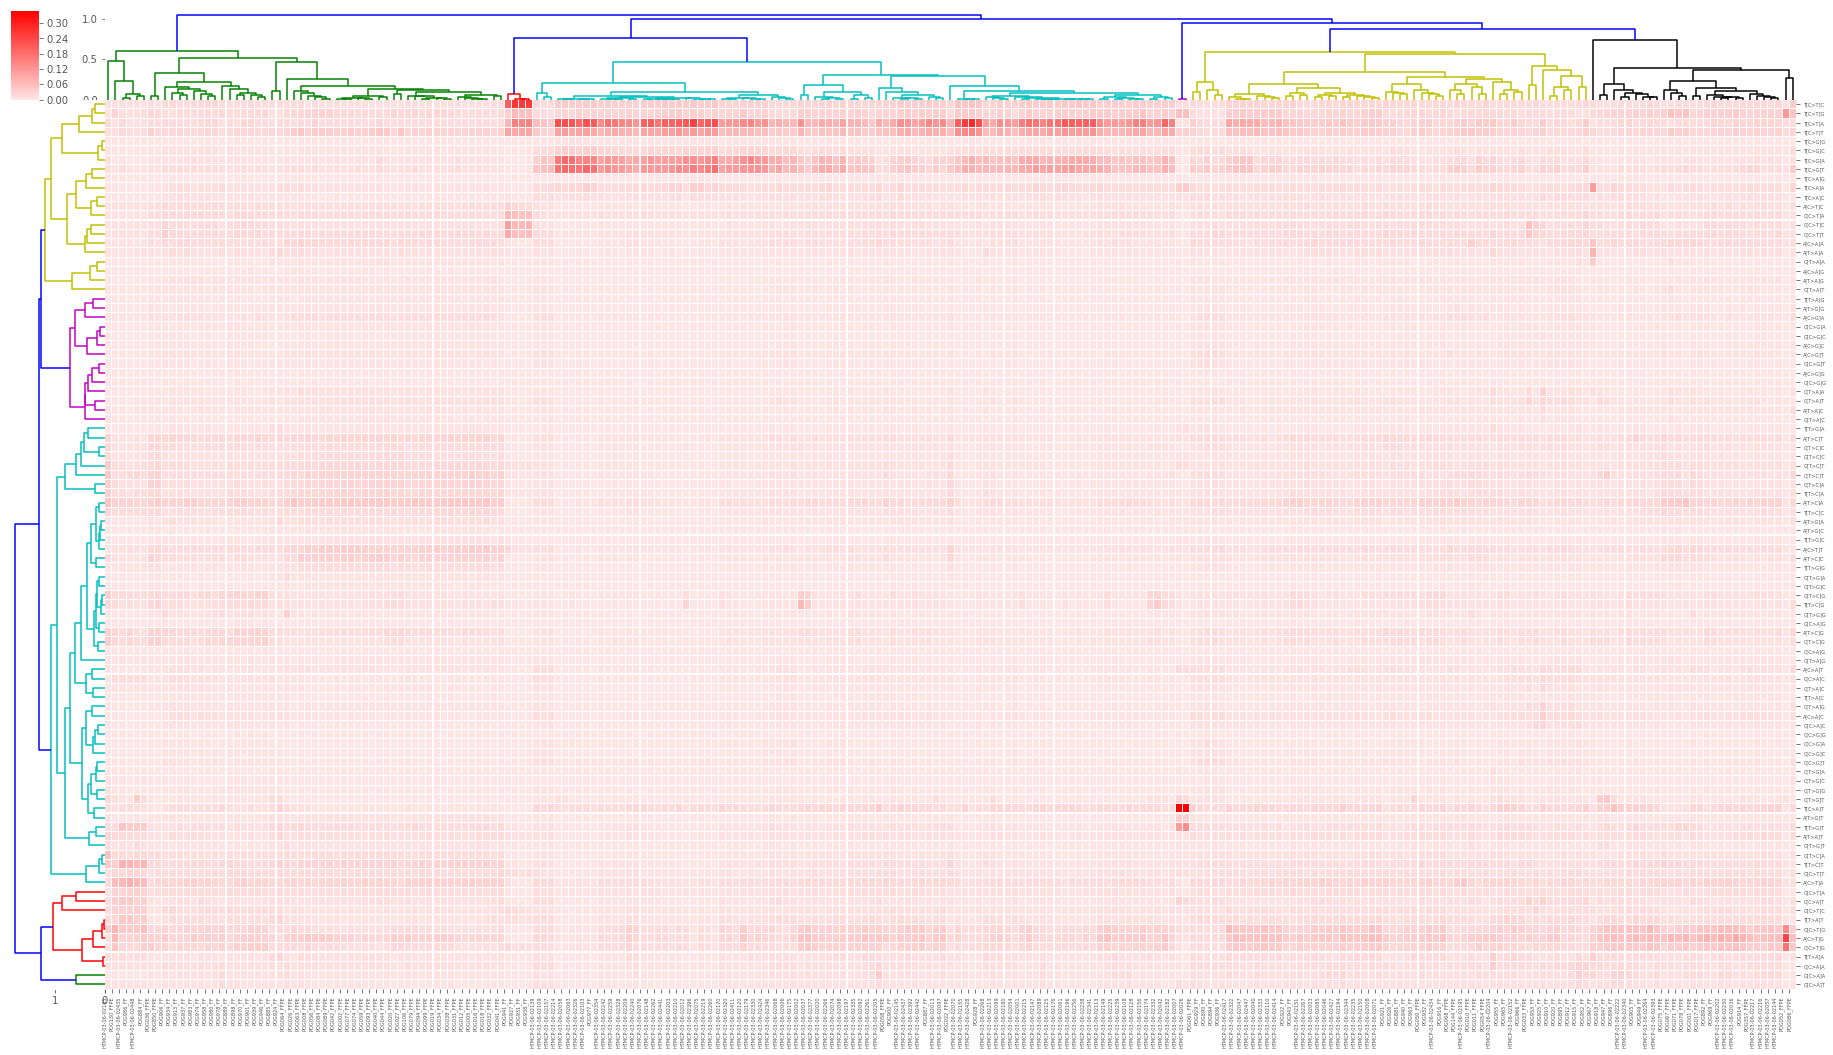

FFPE #CC79A7
draw rect
FF #D55E00
draw rect
HTMCP #E41A1C
draw rect
save plots!
CPU times: user 106 ms, sys: 2 ms, total: 108 ms
Wall time: 145 ms


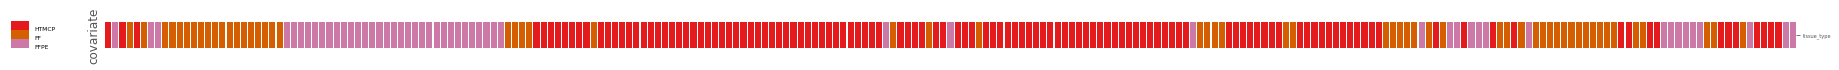

In [40]:
# plot heatmap + dendrogram, and covariate track separately
col_den = plot_cluster_heatmap(dfm)
df_cov = df_cov[col_den['ivl']]
add_covariate(df_cov, map_dict, clrs)
# make sure col labels are consistent
assert df_cov.columns.tolist() == col_den['ivl']


In [34]:
get_cluster_classes(col_den)

g,"['HTMCP-03-06-02435', 'POG986_FF', 'HTMCP-03-06-02448', 'POG884_FF', 'POG130_FFPE', 'HTMCP-03-06-02185', 'POG036_FFPE', 'POG850_FFPE', 'POG913_FF', 'POG937_FF', 'POG934_FF', 'POG958_FF', 'POG980_FF', 'POG974_FF', 'POG983_FF', 'POG906_FF', 'POG898_FF', 'POG970_FF', 'POG939_FF', 'POG946_FF', 'POG901_FF', 'POG889_FF', 'POG978_FF', 'POG885_FF', 'POG924_FF', 'POG084_FFPE', 'POG089_FFPE', 'POG056_FFPE', 'POG008_FFPE', 'POG063_FFPE', 'POG026_FFPE', 'POG002_FFPE', 'POG077_FFPE', 'POG042_FFPE', 'POG059_FFPE', 'POG093_FFPE', 'POG074_FFPE', 'POG040_FFPE', 'POG044_FFPE', 'POG020_FFPE', 'POG027_FFPE', 'POG094_FFPE', 'POG099_FFPE', 'POG034_FFPE', 'POG038_FFPE', 'POG019_FFPE', 'POG079_FFPE', 'POG106_FFPE', 'POG016_FFPE', 'POG018_FFPE', 'POG005_FFPE', 'POG012_FFPE', 'POG031_FFPE', 'POG032_FFPE', 'POG041_FFPE', 'POG064_FFPE']"
r,"['POG931_FF', 'POG938_FF', 'POG927_FF', 'POG941_FF']"
c,"['HTMCP-03-06-02109', 'HTMCP-03-06-02157', 'HTMCP-03-06-02139', 'HTMCP-03-06-02058', 'HTMCP-03-06-02063', 'HTMCP-03-06-02214', 'HTMCP-03-06-02103', 'POG977_FF', 'HTMCP-03-06-02326', 'HTMCP-03-06-02259', 'HTMCP-03-06-02328', 'HTMCP-03-06-02242', 'HTMCP-03-06-02354', 'HTMCP-03-06-02209', 'HTMCP-03-06-02240', 'HTMCP-03-06-02076', 'HTMCP-03-06-02148', 'HTMCP-03-06-02203', 'HTMCP-03-06-02210', 'HTMCP-03-06-02441', 'HTMCP-03-06-02262', 'HTMCP-03-06-02219', 'HTMCP-03-06-02260', 'HTMCP-03-06-02075', 'HTMCP-03-06-02396', 'HTMCP-03-06-02012', 'HTMCP-03-06-02320', 'HTMCP-03-06-02411', 'HTMCP-03-06-02170', 'HTMCP-03-06-02330', 'HTMCP-03-06-02424', 'HTMCP-03-06-02179', 'HTMCP-03-06-02120', 'HTMCP-03-06-02006', 'HTMCP-03-06-02175', 'HTMCP-03-06-02068', 'HTMCP-03-06-02346', 'HTMCP-03-06-02002', 'HTMCP-03-06-02037', 'HTMCP-03-06-02020', 'HTMCP-03-06-02266', 'HTMCP-03-06-02074', 'HTMCP-03-06-02098', 'HTMCP-03-06-02377', 'HTMCP-03-06-02197', 'HTMCP-03-06-02335', 'HTMCP-03-06-02092', 'HTMCP-03-06-02261', 'HTMCP-03-06-02145', 'HTMCP-03-06-02437', 'HTMCP-03-06-02392', 'HTMCP-03-06-02442', 'POG900_FF', 'HTMCP-03-06-02013', 'HTMCP-03-06-02097', 'POG887_FF', 'POG058_FFPE', 'HTMCP-03-06-02205', 'HTMCP-03-06-02428', 'POG928_FF', 'HTMCP-03-06-02155', 'HTMCP-03-06-02070', 'HTMCP-03-06-02099', 'HTMCP-03-06-02180', 'HTMCP-03-06-02213', 'HTMCP-03-06-02268', 'HTMCP-03-06-02001', 'HTMCP-03-06-02215', 'HTMCP-03-06-02125', 'HTMCP-03-06-02176', 'HTMCP-03-06-02089', 'HTMCP-03-06-02147', 'HTMCP-03-06-02061', 'HTMCP-03-06-02196', 'HTMCP-03-06-02238', 'HTMCP-03-06-02341', 'HTMCP-03-06-02256', 'HTMCP-03-06-02054', 'HTMCP-03-06-02113', 'HTMCP-03-06-02149', 'HTMCP-03-06-02225', 'HTMCP-03-06-02239', 'HTMCP-03-06-02128', 'HTMCP-03-06-02156', 'HTMCP-03-06-02108', 'HTMCP-03-06-02174', 'HTMCP-03-06-02332', 'HTMCP-03-06-02042', 'HTMCP-03-06-02182', 'POG022_FFPE']"
m,"['HTMCP-03-06-02007', 'HTMCP-03-06-02026']"
y,"['POG061_FFPE', 'POG929_FF', 'POG894_FF', 'POG936_FF', 'POG890_FF', 'HTMCP-03-06-02047', 'HTMCP-03-06-02447', 'HTMCP-03-06-02322', 'HTMCP-03-06-02417', 'HTMCP-03-06-02110', 'HTMCP-03-06-02414', 'HTMCP-03-06-02333', 'HTMCP-03-06-02040', 'POG922_FF', 'POG943_FF', 'HTMCP-03-06-02151', 'HTMCP-03-06-02267', 'HTMCP-03-06-02003', 'HTMCP-03-06-02085', 'HTMCP-03-06-02046', 'HTMCP-03-06-02427', 'HTMCP-03-06-02194', 'HTMCP-03-06-02344', 'HTMCP-03-06-02008', 'HTMCP-03-06-02071', 'HTMCP-03-06-02150', 'HTMCP-03-06-02235', 'POG881_FF', 'POG940_FF', 'POG926_FF', 'POG921_FF', 'HTMCP-03-06-02434', 'POG916_FF', 'POG932_FF', 'POG050_FFPE', 'POG963_FF', 'POG144_FFPE', 'HTMCP-03-06-02195', 'POG068_FFPE', 'POG011_FFPE', 'POG054_FFPE', 'POG010_FFPE', 'POG955_FF', 'POG965_FF', 'HTMCP-03-06-02152', 'POG966_FF', 'HTMCP-03-06-02204', 'POG033_FFPE', 'POG953_FF', 'POG910_FF', 'POG920_FF', 'POG895_FF', 'POG912_FF', 'POG915_FF', 'POG952_FF', 'POG925_FF', 'POG912_FF', 'POG920_FF']"
k,"['POG918_FF', 'POG947_FF', 'HTMCP-03-06-02222', 'HTMCP-03-06-02340', 'HTMCP-03-06-02264', 'HTMCP-03-06-02393', 'POG949_FF', 'POG905_FF', 'POG896_FF', 'POG071_FFPE', 'POG078_FFPE', 'POG067_FFPE', 'POG075_FFPE', 'POG001_FFPE', 'POG017_FFPE', 'HTMCP-03-